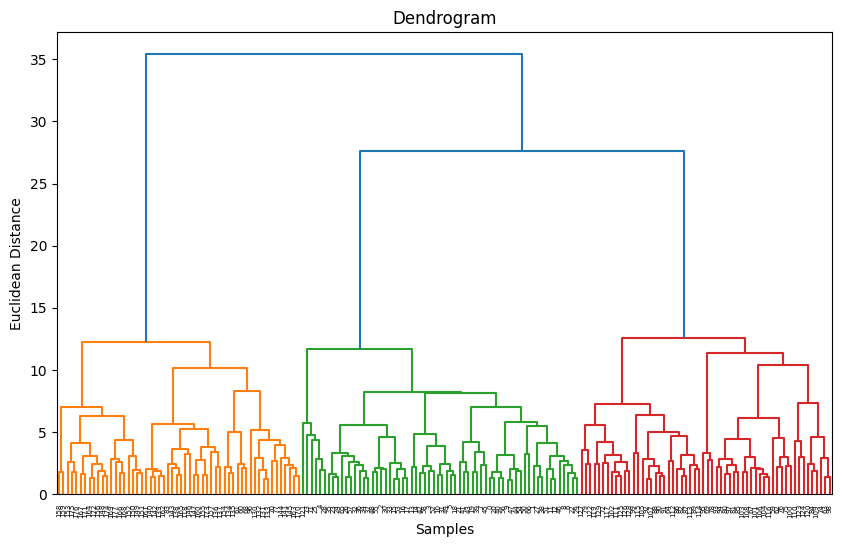

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cluster  
0         

In [3]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load Wine dataset
wine = load_wine()
data = wine.data  # Features
feature_names = wine.feature_names

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

# Add cluster labels to a DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['Cluster'] = labels
print(df.head())
